In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"   #(xxxx is your specific GPU ID)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa, IPython
import librosa.display
import sklearn
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from PIL import Image
# import noisereduce as nr
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [3]:
DATA = pd.read_csv("Selected_split_DATA.csv")
# index = 1000
# librosa.display.waveplot(pd.read_json(DATA["audio"].values[index])["Audio"].values , sr = 44100)
# IPython.display.Audio(pd.read_json(DATA["audio"].values[index])["Audio"].values, rate=44100)

In [4]:
DATA.head()

,start_timestamp,end_timestamp,set,label,participant,label_Detail,semg,audio,split
0,20.050431,21.550431,set_1_birds,nothing,1,nothing,"{""timestamp"":{""0"":20.05,""1"":20.051,""2"":20.052,...","{""Audio"":{""0"":-0.004196167,""1"":-0.0043945312,""...",train
1,60.929161,62.429161,set_1_birds,nothing,1,nothing,"{""timestamp"":{""0"":60.929,""1"":60.93,""2"":60.931,...","{""Audio"":{""0"":0.0024719238,""1"":0.0025939941,""2...",test
2,65.399002,66.899002,set_1_birds,nothing,1,nothing,"{""timestamp"":{""0"":65.399,""1"":65.4,""2"":65.401,""...","{""Audio"":{""0"":-0.0011444092,""1"":-0.0011901855,...",train
3,113.220499,114.720499,set_1_birds,nothing,1,nothing,"{""timestamp"":{""0"":113.22,""1"":113.221,""2"":113.2...","{""Audio"":{""0"":0.0021820068,""1"":0.002456665,""2""...",train
4,125.526799,127.026799,set_1_birds,nothing,1,nothing,"{""timestamp"":{""0"":125.527,""1"":125.528,""2"":125....","{""Audio"":{""0"":-0.0004882812,""1"":-0.0003662109,...",valid


# Examples

In [5]:
#Try an example of index 3040.
index = 3040
label = DATA['label'][index]
participant_no =  DATA['participant'][index]

audio_segment = pd.read_json(DATA["audio"].values[index],numpy=True)

data = audio_segment.dropna().transpose().values
label,participant_no

('continue', 5)

## Example of Spectrogram

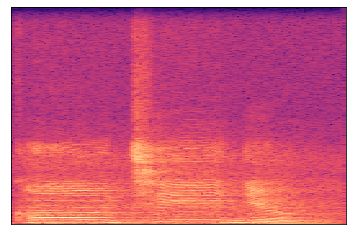

In [6]:
spec = np.abs(librosa.stft(data[0]))
S_dB = librosa.power_to_db(spec, ref=np.max)
# S_dB = librosa.amplitude_to_db(spec, ref=np.max)
img = librosa.display.specshow(S_dB, sr=441000)

## Example of MFCC

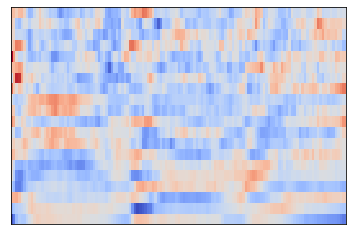

In [7]:
mfcc = librosa.feature.mfcc(data[0], sr=44100)
# Center MFCC coefficient dimensions to the mean and unit variance
mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
img = librosa.display.specshow(mfcc, sr=44100)

## Example of Mel-Spectrogram

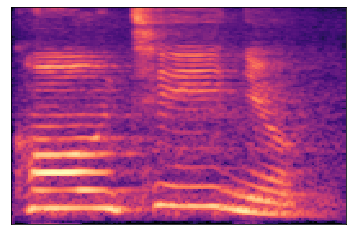

In [8]:
S = librosa.feature.melspectrogram(y=data[0], sr=44100, n_mels=128,
                                fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, sr=441000)

# Get Images

## Get Images of Spectrogram

In [9]:
audio = DATA[['participant','label','audio','split']]
audio_train = audio[audio['split']=='train']
audio_train = audio_train.reset_index(drop=True)

In [10]:
for participant_no in audio_train['participant'].unique():
    for label in audio_train['label'].unique():
        audio_data_ = audio_train[(audio_train['label'] == label)&(audio_train['participant'] == participant_no)]
        audio_data_ = audio_data_.reset_index(drop=True)
        for index in range(0,len(audio_data_)) :   
            
            audio_segment = pd.read_json(audio_data_["audio"].values[index],numpy=True)

            data = audio_segment.dropna().transpose().values
            spec = np.abs(librosa.stft(data[0]))
            fig = plt.Figure()
            canvas = FigureCanvas(fig)
            ax = fig.add_subplot(111)
            S_dB = librosa.amplitude_to_db(spec, ref=np.max)
            img = librosa.display.specshow(S_dB, sr=441000,ax=ax)

        #     filename = "Audio_spec_subject/p_%d/train/%s/%d.jpeg"%(participant_no,label,index)
        #     fig.savefig(filename)   
            filename = "Audio_SPEC/train/%s/p_%d_%d.jpeg"%(label,participant_no,index)    
            fig.savefig(filename)

In [11]:
audio_test = audio[audio['split']=='test']
audio_test = audio_test.reset_index(drop=True)


In [12]:
for participant_no in audio_test['participant'].unique():
    for label in audio_test['label'].unique():
        audio_data_ = audio_test[(audio_test['label'] == label)&(audio_test['participant'] == participant_no)]
        audio_data_ = audio_data_.reset_index(drop=True)
        for index in range(0,len(audio_data_))   : 
            
            audio_segment = pd.read_json(audio_data_["audio"].values[index],numpy=True)

            data = audio_segment.dropna().transpose().values
            spec = np.abs(librosa.stft(data[0]))
            fig = plt.Figure()
            canvas = FigureCanvas(fig)
            ax = fig.add_subplot(111)
            S_dB = librosa.amplitude_to_db(spec, ref=np.max)
            img = librosa.display.specshow(S_dB, sr=441000,ax=ax)

        #     filename = "Audio_spec_subject/p_%d/test/%s/%d.jpeg"%(participant_no,label,index)
        #     fig.savefig(filename)   
            filename = "Audio_SPEC/test/%s/p_%d_%d.jpeg"%(label,participant_no,index)    
            fig.savefig(filename)

In [13]:
audio_val = audio[audio['split']=='valid']
audio_val = audio_val.reset_index(drop=True)

In [14]:
for participant_no in audio_val['participant'].unique():
    for label in audio_val['label'].unique():
        audio_data_ = audio_val[(audio_test['label'] == label)&(audio_val['participant'] == participant_no)]
        audio_data_ = audio_data_.reset_index(drop=True)
        for index in range(0,len(audio_data_))   : 
            
            audio_segment = pd.read_json(audio_data_["audio"].values[index],numpy=True)

            data = audio_segment.dropna().transpose().values
            spec = np.abs(librosa.stft(data[0]))
            fig = plt.Figure()
            canvas = FigureCanvas(fig)
            ax = fig.add_subplot(111)
            S_dB = librosa.amplitude_to_db(spec, ref=np.max)
            img = librosa.display.specshow(S_dB, sr=441000,ax=ax)

        #     filename = "Audio_spec_subject/p_%d/validation/%s/%d.jpeg"%(participant_no,label,index)
        #     fig.savefig(filename)   
            filename = "Audio_SPEC/validation/%s/p_%d_%d.jpeg"%(label,participant_no,index)    
            fig.savefig(filename)

## Get Images of MFCC

In [15]:
audio = DATA[['participant','label','audio','split']]
audio_train = audio[audio['split']=='train']
audio_train = audio_train.reset_index(drop=True)

In [16]:
for participant_no in audio_train['participant'].unique():
    for label in audio_train['label'].unique():
        audio_data_ = audio_train[(audio_train['label'] == label)&(audio_train['participant'] == participant_no)]
        audio_data_ = audio_data_.reset_index(drop=True)
        for index in range(0,len(audio_data_)) :   
            
            audio_segment = pd.read_json(audio_data_["audio"].values[index],numpy=True)

            data = audio_segment.dropna().transpose().values
            mfcc = librosa.feature.mfcc(data[0], sr=44100)
            # Center MFCC coefficient dimensions to the mean and unit variance
            mfcc = sklearn.preprocessing.scale(mfcc, axis=1) 
            fig = plt.Figure()
            canvas = FigureCanvas(fig)
            ax = fig.add_subplot(111)
            img = librosa.display.specshow(mfcc, sr=441000,ax=ax)

        #     filename = "Audio_MFCC_subject/p_%d/train/%s/%d.jpeg"%(participant_no,label,index)
        #     fig.savefig(filename)   
            filename = "Audio_MFCC/train/%s/p_%d_%d.jpeg"%(label,participant_no,index)    
            fig.savefig(filename)

In [17]:
audio_test = audio[audio['split']=='test']
audio_test = audio_test.reset_index(drop=True)


In [18]:
for participant_no in audio_test['participant'].unique():
    for label in audio_test['label'].unique():
        audio_data_ = audio_test[(audio_test['label'] == label)&(audio_test['participant'] == participant_no)]
        audio_data_ = audio_data_.reset_index(drop=True)
        for index in range(0,len(audio_data_))   : 
            audio_segment = pd.read_json(audio_data_["audio"].values[index],numpy=True)

            data = audio_segment.dropna().transpose().values
            mfcc = librosa.feature.mfcc(data[0], sr=44100)
            # Center MFCC coefficient dimensions to the mean and unit variance
            mfcc = sklearn.preprocessing.scale(mfcc, axis=1) 
            fig = plt.Figure()
            canvas = FigureCanvas(fig)
            ax = fig.add_subplot(111)
            img = librosa.display.specshow(mfcc, sr=441000,ax=ax)
        #     filename = "Audio_MFCC_subject/p_%d/test/%s/%d.jpeg"%(participant_no,label,index)
        #     fig.savefig(filename)   
            filename = "Audio_MFCC/test/%s/p_%d_%d.jpeg"%(label,participant_no,index)    
            fig.savefig(filename)

In [19]:
audio_val = audio[audio['split']=='valid']
audio_val = audio_val.reset_index(drop=True)

In [20]:
for participant_no in audio_val['participant'].unique():
    for label in audio_val['label'].unique():
        audio_data_ = audio_val[(audio_test['label'] == label)&(audio_val['participant'] == participant_no)]
        audio_data_ = audio_data_.reset_index(drop=True)
        for index in range(0,len(audio_data_))   : 
            
            audio_segment = pd.read_json(audio_data_["audio"].values[index],numpy=True)

            data = audio_segment.dropna().transpose().values
            mfcc = librosa.feature.mfcc(data[0], sr=44100)
            # Center MFCC coefficient dimensions to the mean and unit variance
            mfcc = sklearn.preprocessing.scale(mfcc, axis=1) 
            fig = plt.Figure()
            canvas = FigureCanvas(fig)
            ax = fig.add_subplot(111)
            img = librosa.display.specshow(mfcc, sr=441000,ax=ax)
        #     filename = "Audio_MFCC_subject/p_%d/validation/%s/%d.jpeg"%(participant_no,label,index)
        #     fig.savefig(filename)   
            filename = "Audio_MFCC/validation/%s/p_%d_%d.jpeg"%(label,participant_no,index)    
            fig.savefig(filename)

## Get Images of Mel-Spectrogram

In [21]:
audio = DATA[['participant','label','audio','split']]
audio_train = audio[audio['split']=='train']
audio_train = audio_train.reset_index(drop=True)

In [22]:
for participant_no in audio_train['participant'].unique():
    for label in audio_train['label'].unique():
        audio_data_ = audio_train[(audio_train['label'] == label)&(audio_train['participant'] == participant_no)]
        audio_data_ = audio_data_.reset_index(drop=True)
        for index in range(0,len(audio_data_)) :   
            
            audio_segment = pd.read_json(audio_data_["audio"].values[index],numpy=True)

            data = audio_segment.dropna().transpose().values
            S = librosa.feature.melspectrogram(y=data[0], sr=44100, n_mels=128,
                                        fmax=8000)
            fig = plt.Figure()
            canvas = FigureCanvas(fig)
            ax = fig.add_subplot(111)
            S_dB = librosa.power_to_db(S, ref=np.max)
            img = librosa.display.specshow(S_dB, sr=441000,ax=ax)

        #     filename = "Audio_MEL_subject/p_%d/train/%s/%d.jpeg"%(participant_no,label,index)
        #     fig.savefig(filename)   
            filename = "Audio_MEL/train/%s/p_%d_%d.jpeg"%(label,participant_no,index)    
            fig.savefig(filename)

In [23]:
audio_test = audio[audio['split']=='test']
audio_test = audio_test.reset_index(drop=True)


In [24]:
for participant_no in audio_test['participant'].unique():
    for label in audio_test['label'].unique():
        audio_data_ = audio_test[(audio_test['label'] == label)&(audio_test['participant'] == participant_no)]
        audio_data_ = audio_data_.reset_index(drop=True)
        for index in range(0,len(audio_data_))   : 
            audio_segment = pd.read_json(audio_data_["audio"].values[index],numpy=True)

            data = audio_segment.dropna().transpose().values
            S = librosa.feature.melspectrogram(y=data[0], sr=44100, n_mels=128,
                                        fmax=8000)
            fig = plt.Figure()
            canvas = FigureCanvas(fig)
            ax = fig.add_subplot(111)
            S_dB = librosa.power_to_db(S, ref=np.max)
            img = librosa.display.specshow(S_dB, sr=441000,ax=ax)
        #     filename = "Audio_MEL_subject/p_%d/test/%s/%d.jpeg"%(participant_no,label,index)
        #     fig.savefig(filename)   
            filename = "Audio_MEL/test/%s/p_%d_%d.jpeg"%(label,participant_no,index)    
            fig.savefig(filename)

In [25]:
audio_val = audio[audio['split']=='valid']
audio_val = audio_val.reset_index(drop=True)

In [26]:
for participant_no in audio_val['participant'].unique():
    for label in audio_val['label'].unique():
        audio_data_ = audio_val[(audio_test['label'] == label)&(audio_val['participant'] == participant_no)]
        audio_data_ = audio_data_.reset_index(drop=True)
        for index in range(0,len(audio_data_))   : 
            
            audio_segment = pd.read_json(audio_data_["audio"].values[index],numpy=True)

            data = audio_segment.dropna().transpose().values
            S = librosa.feature.melspectrogram(y=data[0], sr=44100, n_mels=128,
                                        fmax=8000)
            fig = plt.Figure()
            canvas = FigureCanvas(fig)
            ax = fig.add_subplot(111)
            S_dB = librosa.power_to_db(S, ref=np.max)
            img = librosa.display.specshow(S_dB, sr=441000,ax=ax)
        #     filename = "Audio_MEL_subject/p_%d/validation/%s/%d.jpeg"%(participant_no,label,index)
        #     fig.savefig(filename)   
            filename = "Audio_MEL/validation/%s/p_%d_%d.jpeg"%(label,participant_no,index)    
            fig.savefig(filename)